#### Import of the Packages

In [1]:
# for Linear regression 
import torch
import torch.nn as nn
import numpy as np
import session_info
from sklearn import datasets
import matplotlib.pyplot as plt

# plus for Logistic regression 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

session_info.show()

### Linear Regression

##### Preparation of data

In [2]:
X_numpy , y_numpy = datasets.make_regression(n_samples= 220, n_features=1, noise=10, random_state=5)

X= torch.from_numpy(X_numpy.astype(np.float32))
y= torch.from_numpy(y_numpy.astype(np.float32))

n_samples,n_features = X.shape
y= y.view(y.shape[0],1)


##### Model

In [3]:
input_shape= n_features
output_shape= 1

model=nn.Linear(input_shape,output_shape)

###### Loss and optimizer

In [4]:
loss= nn.MSELoss()
learning_rate= 0.01
optimizer= torch.optim.SGD(model.parameters(),lr=learning_rate)

##### Training loop

In [5]:
n_iters= 200
for epoch in range(n_iters):
    # forward pass
    y_pred= model(X)
    l=loss(y_pred, y)
    
    #backward pass
    l.backward()
    
    #update weights
    optimizer.step()
    optimizer.zero_grad()
    
    #print info
    if (epoch+1) %10 == 0:
        [w,b] = model.parameters()
        print(f'epoch{epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')


epoch10: w = 1.101, loss = 141.53901672
epoch20: w = 2.394, loss = 124.23297882
epoch30: w = 3.458, loss = 112.52770233
epoch40: w = 4.333, loss = 104.60917664
epoch50: w = 5.053, loss = 99.25141144
epoch60: w = 5.645, loss = 95.62565613
epoch70: w = 6.131, loss = 93.17159271
epoch80: w = 6.532, loss = 91.51027679
epoch90: w = 6.861, loss = 90.38545990
epoch100: w = 7.132, loss = 89.62374115
epoch110: w = 7.354, loss = 89.10784149
epoch120: w = 7.538, loss = 88.75836182
epoch130: w = 7.688, loss = 88.52159119
epoch140: w = 7.812, loss = 88.36115265
epoch150: w = 7.914, loss = 88.25242615
epoch160: w = 7.998, loss = 88.17872620
epoch170: w = 8.067, loss = 88.12875366
epoch180: w = 8.124, loss = 88.09488678
epoch190: w = 8.171, loss = 88.07192230
epoch200: w = 8.209, loss = 88.05633545


##### Plot some result and history

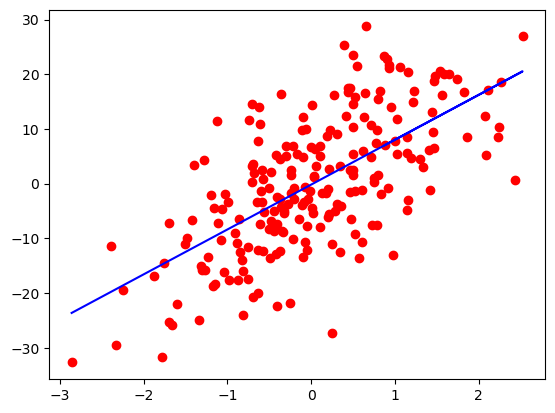

In [6]:
predicted = model(X).detach().numpy() # we detach the result tensor to avoid the track of the gradient
plt.plot(X_numpy,y_numpy,'ro')
plt.plot(X_numpy, predicted,'b')
plt.show()

### Logistic Regression

##### Preparation of data (breast cancer prediction)

In [7]:
bc=datasets.load_breast_cancer()
X,y= bc.data, bc.target

n_sample, n_feature = X.shape

# train/test split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size= 0.2, random_state= 25)

# Normalization
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [8]:
# Conversion to tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))

y_train = y_train.view(y_train.shape[0],1)
y_test = y_test.view(y_test.shape[0],1)

##### Model

In [9]:
class LogisticReg(nn.Module):
    def __init__(self, n_input_feature):
        super(LogisticReg,self).__init__()
        self.linear1= nn.Linear(n_input_feature,10)
        self.linear2= nn.Linear(10,1)
        
    def forward(self, x):
        x=self.linear1(x)
        x= nn.functional.relu(x)
        x= self.linear2(x)
        output= torch.sigmoid(x)
        return output

model= LogisticReg(n_feature)       

###### Loss and optimizer

In [10]:
loss= nn.BCELoss()
learning_rate= 0.1
optimizer= torch.optim.SGD(model.parameters(),lr=learning_rate)

##### Training loop

In [11]:
n_iters= 200
for epoch in range(n_iters):
    # forward pass
    y_pred= model(X_train)
    l=loss(y_pred, y_train)
    
    #backward pass
    l.backward()
    
    #update weights
    optimizer.step()
    optimizer.zero_grad()
    
    #print info
    if (epoch+1) %20 == 0:
        with torch.no_grad():
            y_pred_class= y_pred.round()
            acc= y_pred_class.eq(y_train).sum()/ float(y_train.shape[0])
        print(f'epoch:{epoch+1}, loss = {l:.8f}, train_accuracy= {acc:.4f}')

with torch.no_grad():
    y_predicted= model(X_test)
    y_predicted_class= y_predicted.round()
    acc= y_predicted_class.eq(y_test).sum()/ float(y_test.shape[0])
    print(f'test_accuracy= {acc:.4f}')


epoch:20, loss = 0.36816150, train_accuracy= 0.9385
epoch:40, loss = 0.20126696, train_accuracy= 0.9495
epoch:60, loss = 0.14216712, train_accuracy= 0.9670
epoch:80, loss = 0.11261605, train_accuracy= 0.9714
epoch:100, loss = 0.09428540, train_accuracy= 0.9736
epoch:120, loss = 0.08244862, train_accuracy= 0.9758
epoch:140, loss = 0.07437917, train_accuracy= 0.9780
epoch:160, loss = 0.06820121, train_accuracy= 0.9824
epoch:180, loss = 0.06335497, train_accuracy= 0.9868
epoch:200, loss = 0.05957436, train_accuracy= 0.9868
test_accuracy= 0.9737
